In [1]:
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D    # Support 3D graphing

import numpy as np
import pandas as pd

from pprint import pprint

# Machine Learning - Models
from sklearn.linear_model import LinearRegression  # TBD
from sklearn.linear_model import Lasso             # TBD
from sklearn.linear_model import Ridge             # TBD
from sklearn.linear_model import ElasticNet        # TBD

# Machine Learning - Data Preparation and Pre-Processing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder   # Convert categorical integer features (X) to One-Hot encoded values
from sklearn.preprocessing import LabelEncoder    # Convert categorical labeled values to categorical integer values
from sklearn.preprocessing import LabelBinarizer  # Convert categorical labeled values to Binary encoded values

from sklearn.preprocessing import StandardScaler  # Scale numerical features to standard normal distribution
from sklearn.preprocessing import MinMaxScaler    # Scale numerical values based upon mix/max values

# Machine Learning - Quantify Model Performance
from sklearn.metrics import mean_squared_error   # Mean Squared Error (MSE) metric
from sklearn.metrics import r2_score             # R-squared (Coefficient of Determination) metric

# Machine Learning - Dataset Generation
from sklearn.datasets import make_regression     # Generate linear data
from sklearn.datasets import make_s_curve        # Generate nonlinear data
from sklearn.datasets import make_blobs          # Generate blobs for classification
from sklearn.datasets import make_circles        # Generate circles for classification

# Linear Models

## Read, Encode, and Scale the Data

In [2]:
# Read the csv file into a pandas DataFrame
smoking = pd.read_csv('resources/smoking.csv')
smoking.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [3]:
smoking.describe()

,Id,Age,FEV,Height
count,654.000000,654.000000,654.000000,654.000000
mean,37169.571865,9.931193,2.636780,61.143578
std,23690.860350,2.953935,0.867059,5.703513
min,201.000000,3.000000,0.791000,46.000000
25%,15811.000000,8.000000,1.981000,57.000000
50%,36071.000000,10.000000,2.547500,61.500000
75%,53638.500000,12.000000,3.118500,65.500000
max,90001.000000,19.000000,5.793000,74.000000


In [4]:
# Use Pandas get_dummies to convert categorical data
d_smoking = pd.get_dummies(smoking)
d_smoking.head()

,Id,Age,FEV,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
0,301,9,1.708,57.0,1,0,0,1
1,451,8,1.724,67.5,1,0,0,1
2,501,7,1.720,54.5,1,0,0,1
3,642,9,1.558,53.0,0,1,0,1
4,901,9,1.895,57.0,0,1,0,1


In [5]:
# Assign X (data) and y (target)
X = d_smoking[ ["Age", "Height", "Sex_Female", "Sex_Male", "Smoker_Current", "Smoker_Non" ]]
y = d_smoking[ ["FEV"] ].values.reshape(-1, 1)
print(X.shape, y.shape)

(654, 6) (654, 1)


In [6]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.head()

,Age,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
593,11,68.5,0,1,1,0
336,10,60.5,1,0,0,1
549,14,72.5,0,1,0,1
504,12,63.5,1,0,0,1
90,9,61.5,1,0,0,1


In [7]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Function: Fit Model, Calculate Predictions, Evaluate Performance, Create Residuals Chart

In [9]:
# Function to fit a model to training data, calculate predictions, and create a residuals chart
def gen_prediction(a_model):
    # Get the name of this model
    m_name = str(a_model).split("(",1)[0]
    
    # Fit the data to the scaled data
    m_fit_time = %timeit -n1 -r1 -o a_model.fit(X_train_scaled, y_train_scaled)

    # Make predictions using the X_test_scaled data
    train_predicted_y_scaled = a_model.predict(X_train_scaled).reshape(-1,1)
    train_residuals_scaled = (train_predicted_y_scaled - y_train_scaled).reshape(-1,1)

    test_predicted_y_scaled = a_model.predict(X_test_scaled).reshape(-1,1)
    test_residuals_scaled = (test_predicted_y_scaled - y_test_scaled).reshape(-1,1)

    # Plot y_test_scaled vs y_test_scaled
    # Scatter plot y_test_scaled vs predictions

    # Generate a plot
    plt.scatter(train_predicted_y_scaled, train_residuals_scaled, c="blue", label="Training Data")
    plt.scatter(test_predicted_y_scaled, test_residuals_scaled, c="red", label="Testing Data")

    plt.legend()

    plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
    plt.title(f"Residual Plot - Model: {m_name}")
    plt.show()

    # Calculate Model performance: MSE and R2
    score_r2 = r2_score(y_test_scaled, test_predicted_y_scaled)
    score_mse = mean_squared_error(y_test_scaled, test_predicted_y_scaled)

    print(f"Performance - Model: {m_name}\nR2: {score_r2}, MSE: {score_mse}")
    
    a_result = {
        'model': m_name,
        'fit_time': m_fit_time.average,
        'r2': score_r2,
        'mse': score_mse
    }
    
    return a_result

In [10]:
# Tally results for a summary table
model_results = []

## Regression Model: Linear Regression

9.42 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


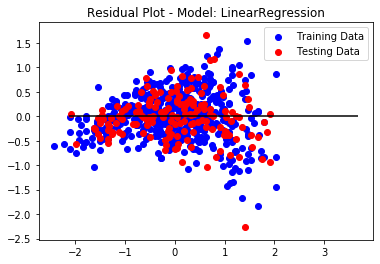

Performance - Model: LinearRegression
R2: 0.7936253097721697, MSE: 0.21723924000723965


In [11]:
model = LinearRegression()
r = gen_prediction(model)
model_results.append( { 'Model': r['model'], 'Fit Time': r['fit_time'], 'R2': r['r2'], 'MSE': r['mse'] } )

## Regression Model: Lasso

1.33 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


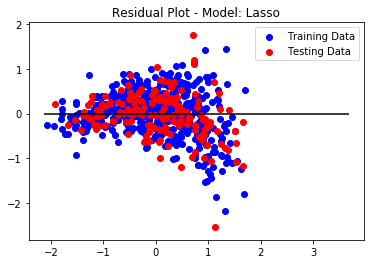

Performance - Model: Lasso
R2: 0.7626059192340645, MSE: 0.24989163947805917


In [12]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
model = Lasso(alpha=0.1)
r = gen_prediction(model)
model_results.append( { 'Model': r['model'], 'Fit Time': r['fit_time'], 'R2': r['r2'], 'MSE': r['mse'] } )

## Regression Model: Ridge

2.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


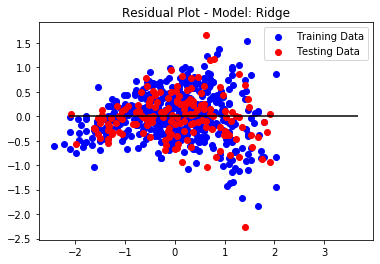

Performance - Model: Ridge
R2: 0.7936275597427331, MSE: 0.21723687158747518


In [13]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
model = Ridge(alpha=0.01)
r = gen_prediction(model)
model_results.append( { 'Model': r['model'], 'Fit Time': r['fit_time'], 'R2': r['r2'], 'MSE': r['mse'] } )

## Regression Model: ElasticNet

2.02 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


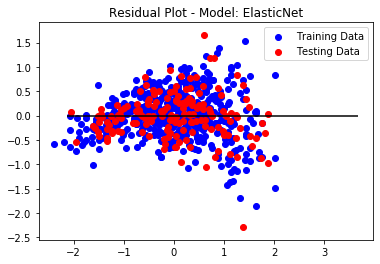

Performance - Model: ElasticNet
R2: 0.79338172454121, MSE: 0.2174956487286398


In [14]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
model = ElasticNet(alpha=0.01)
r = gen_prediction(model)
model_results.append( { 'Model': r['model'], 'Fit Time': r['fit_time'], 'R2': r['r2'], 'MSE': r['mse'] } )

## Regression Model: Summary

In [15]:
summary_df = pd.DataFrame( model_results, columns=['Model','Fit Time', 'R2', 'MSE'])
summary_df

,Model,Fit Time,R2,MSE
0,LinearRegression,0.009418,0.793625,0.217239
1,Lasso,0.001333,0.762606,0.249892
2,Ridge,0.002024,0.793628,0.217237
3,ElasticNet,0.002016,0.793382,0.217496
